# ML Assignment 1: Implement a logistic regression and KNN model on iris dataset. 
# Find out the test score for each model. (Create train test split using random_state=42) 
# Dataset Link: https://www.kaggle.com/tanyaganesan/iris-dataset-logistic-regression Upload pdf of code file as a submission.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DataSets/iris.csv')

In [3]:
df.head()

,x0,x1,x2,x3,x4,type
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,1,4.7,3.2,1.3,0.2,Iris-setosa
3,1,4.6,3.1,1.5,0.2,Iris-setosa
4,1,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      150 non-null    int64  
 1   x1      150 non-null    float64
 2   x2      150 non-null    float64
 3   x3      150 non-null    float64
 4   x4      150 non-null    float64
 5   type    150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
X = df[['x0', 'x1', 'x2', 'x3', 'x4']]
y = df['type']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 5), (30, 5), (120,), (30,))

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scalar = MinMaxScaler()

In [11]:
scalar.fit(X_train)

MinMaxScaler()

In [12]:
scalar.data_max_

array([1. , 7.7, 4.4, 6.7, 2.5])

In [13]:
scalar.data_min_

array([1. , 4.3, 2. , 1. , 0.1])

In [14]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

# 1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.925, 0.9666666666666667)

# code for client to test model

In [19]:
q0 = [[1, 5.2, 4, 5, 1.5]]

In [20]:
q0_scaled = scalar.transform(q0)

In [21]:
model.predict(q0_scaled)

array(['Iris-virginica'], dtype=object)

In [22]:
def get_predict(q0):
    q0_scaled = scalar.transform(q0)
    yp = model.predict(q0_scaled)
    return yp

In [23]:
q1 = np.array([[1, 5.2, 4, 5, 1.5], [2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3]])

get_predict(q1)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

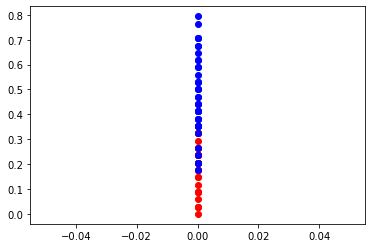

In [24]:
class_0 = X_train_scaled[y_train=='Iris-setosa']
class_1 = X_train_scaled[y_train=='Iris-versicolor']

plt.scatter(class_0[:, 0], class_0[:, 1], c='red')
plt.scatter(class_1[:, 0], class_1[:, 1], c ='blue')

# wrong graph plot

In [25]:
# Graph is not getting proper, it may be because of y = df['type'] has more than 2 classes

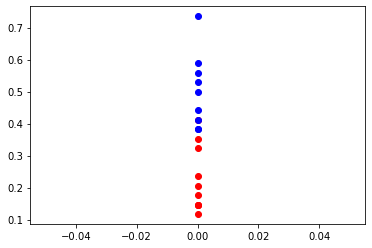

In [26]:
class_0 = X_test_scaled[y_test=='Iris-setosa']
class_1 = X_test_scaled[y_test=='Iris-versicolor']

plt.scatter(class_0[:, 0], class_0[:, 1], c='red')
plt.scatter(class_1[:, 0], class_1[:, 1], c ='blue')

# wrong graph plot

# 2. KNN model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model_1 = KNeighborsClassifier(n_neighbors=13)

In [29]:
model_1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [30]:
model_1.score(X_train_scaled, y_train), model_1.score(X_test_scaled, y_test)

(0.9666666666666667, 1.0)

# code for client to test model

In [31]:
q0 = [[1, 5.2, 4, 5, 1.5]]

In [32]:
q0_scaled = scalar.transform(q0)

In [33]:
model.predict(q0_scaled)

array(['Iris-virginica'], dtype=object)

In [34]:
def get_predict(q0):
    q0_scaled = scalar.transform(q0)
    yp = model.predict(q0_scaled)
    return yp

In [35]:
q1 = np.array([[1, 5.2, 4, 5, 1.5], [2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3]])

get_predict(q1)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [36]:
q1 = [[1, 5.2, 4, 5, 1.5]]

get_predict(q1)

array(['Iris-virginica'], dtype=object)